### Riskwatch Charts

- Target report release date of 18/04

- TODO: Add Chart Titles
- TODO: Larger Radar Chart Labels

In [75]:
# package imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import *
plotly.offline.init_notebook_mode(connected=True)

from IPython.display import display # Nicer print outputs
plt.style.use('fivethirtyeight')
pd.set_option('mode.chained_assignment', None) # Ignores SettingWithCopy warning


# display full output in Jupyter Notebook
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

### Update and reuse from base RE_RiskIndex04.04.xlsx

- create update RW2023.xlsx from that

In [76]:
# import data
path = %pwd
# filters out filetypes in current directory
rw_sheet = [f for f in os.listdir(path) if f.endswith('.xlsx')]
print(path, '\n', rw_sheet, '\n')

c:\Users\Ash\OneDrive - Inspiratia\Projects\tests\riskwatch_owid\rw2023_charts 
 ['RW_2023dataset04.04.xlsx', 'RW_2023datset_CC04.04.xlsx'] 



### Riskwatch dataset
- Heatmap
- 2 radar charts
    - top 5 and bottom 5 countries

- tables per subcategory + overall table (top 10)
- Basic charts on subcategories + overall (top 10)

In [77]:
# Remember not to have the xlsx file open
df_rw = pd.read_excel(path + '/' + rw_sheet[0], sheet_name='Europe_04.04')
df_rw.head()

,Country,Region,R&D Spending,Score,Business Freedom,Score2,Transition Readiness,Score3,PPA Capacity,Score4,...,Renewables Investment,Score25,Electricity Exports,Score26,Electricity Investment per capita,Score27,T&D Losses,Score28,IO Score,Overall Score
0,Germany,Europe,0.379,43.7,87.2,76.6,96.6,100.0,1615.13,88.2,...,46651.4119,86.2,-262.0,4.3,160.574191,25.0,4.303251,13.3,32.200000,62.478571
1,United Kingdom,Europe,0.455,56.2,79.1,43.3,90.6,96.6,2125.80,94.1,...,222460.0351,100.0,-12.0,69.5,179.925125,41.6,7.428875,66.6,69.425000,64.078571
2,Switzerland,Europe,NaN,NaN,84.3,66.6,86.7,93.3,NaN,NaN,...,241.9842,10.3,-129.0,8.6,NaN,NaN,6.658917,43.3,20.733333,64.039286
3,France,Europe,0.734,93.7,81.9,53.3,86.3,90.0,495.00,58.8,...,48427.0728,89.6,-264.0,0.0,350.270009,100.0,7.145758,56.6,61.550000,58.142857
4,Italy,Europe,NaN,NaN,73.8,16.6,84.1,86.6,455.75,47.0,...,26918.7033,79.3,-21.0,52.1,227.186163,75.0,5.738460,36.6,60.750000,41.463095


In [78]:
print(list(df_rw.columns))

['Country', 'Region', 'R&D Spending', 'Score', 'Business Freedom', 'Score2', 'Transition Readiness', 'Score3', 'PPA Capacity', 'Score4', 'PS Score', 'Nominal GDP', 'Score5', 'GDP Growth Forecast', 'Score6', 'GDP per Capita', 'Score7', 'Fiscal Health ', 'Score8', 'MO Score', 'Rule of Law', 'Score9', 'Political Stability', 'Score10', 'Government Integrity', 'Score11', 'Corruption Perceptions', 'Score12', 'IS Score', 'Renewables Capacity (MW)', 'Score13', 'Renewables Capacity (% of total)', 'Score14', 'RE Generation per capita', 'Score15', 'RE Consumption per capita', 'Score16', 'MS Score', 'Enforcing Contracts', 'Score17', 'Construction Permits', 'Score18', 'Judicial Independence ', 'Score19', 'Protecting Minority Investors', 'Score20', 'LF Score', 'Bank Z-score', 'Score21', 'Financial System - Depth', 'Score22', 'Domestic Credit to Private Sector (% GDP)', 'Score23', 'Financial System - Stability', 'Score24', 'FE Score', 'Renewables Investment', 'Score25', 'Electricity Exports', 'Score2

In [79]:
subset = df_rw[['Country', 'Transition Readiness', 'LF Score', 'IO Score']]

In [80]:
subset.columns = ['Country', 'Transition Readiness', 'Legal Framework', 'Investment Openness']

In [81]:
subset = subset.head(10).sort_values(by='Legal Framework', ascending=False).round(2)
subset

,Country,Transition Readiness,Legal Framework,Investment Openness
7,Netherlands,82.3,86.65,66.18
1,United Kingdom,90.6,68.28,69.42
9,Ireland,81.4,59.97,75.10
0,Germany,96.6,55.80,32.20
3,France,86.3,50.80,61.55
6,Bulgaria,82.6,43.30,64.20
2,Switzerland,86.7,38.30,20.73
5,Slovakia,82.6,29.12,25.57
4,Italy,84.1,20.80,60.75
8,Greece,81.7,20.80,61.83


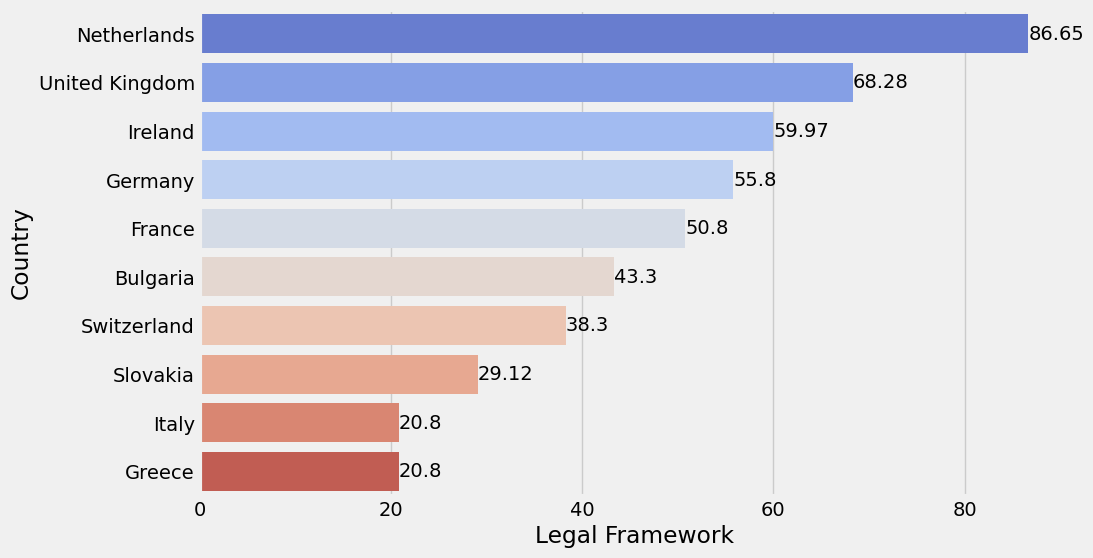

In [82]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=subset, x='Legal Framework', y='Country',palette='coolwarm')
# plt.xscale('log')
ax.bar_label(ax.containers[0])
plt.show()

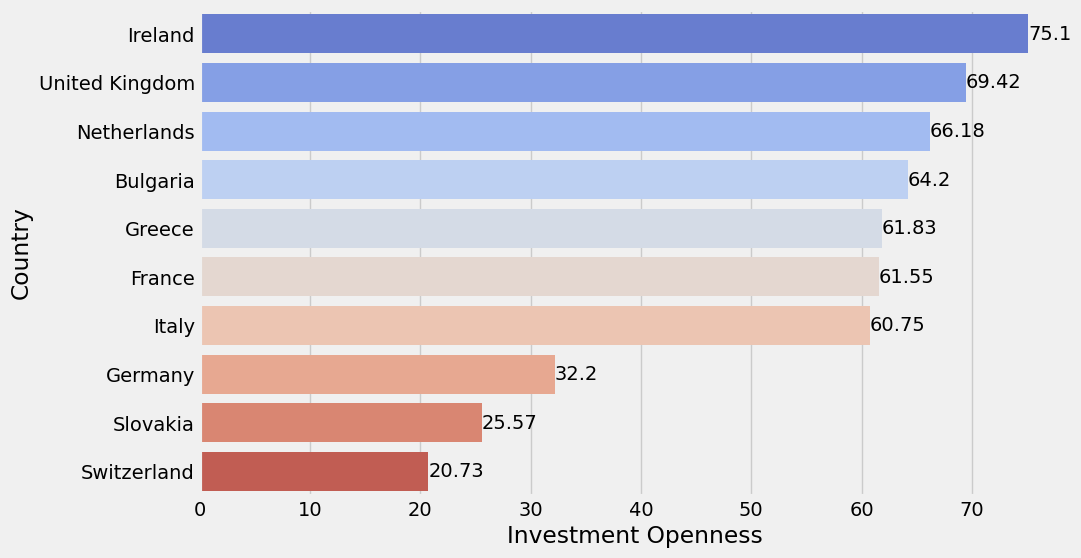

In [83]:
subset = subset.head(10).sort_values(by='Investment Openness', ascending=False).round(2)

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=subset, x='Investment Openness', y='Country',palette='coolwarm')
# plt.xscale('log')
ax.bar_label(ax.containers[0])
plt.show()

### Capacity Charts

- Renewables Capacity (MW)
- PPA Capacity (MW)
- RE Generation per capita (KWh)
- RE Consumption per capita (KWh)

bar for top + bottom 5 (exc.nulls)

In [84]:
energy = df_rw[['Country', 'Renewables Capacity (MW)', 'PPA Capacity',
                  'RE Generation per capita', 'RE Consumption per capita']]

In [85]:
energy.head()

,Country,Renewables Capacity (MW),PPA Capacity,RE Generation per capita,RE Consumption per capita
0,Germany,138151.000,1615.13,2767.102,8189.967
1,United Kingdom,50292.999,2125.80,1816.262,5319.537
2,Switzerland,18812.800,NaN,4614.902,12601.874
3,France,59545.895,495.00,1896.130,5535.208
4,Italy,56986.526,455.75,1963.696,5471.873


In [86]:
energy.columns = ['Country', 'Renewables Capacity 2022 (GW)', 'PPA Capacity 2022 (MW)',
                  'RE Generation Per Capita 2021 (MWh)', 'RE Consumption Per Capita 2021 (MWh)']

In [87]:
energy['Renewables Capacity 2022 (GW)'] = energy['Renewables Capacity 2022 (GW)'].apply(lambda x: x * 0.001)
energy['RE Generation Per Capita 2021 (MWh)'] = energy['RE Generation Per Capita 2021 (MWh)'].apply(lambda x: x * 0.001)
energy['RE Consumption Per Capita 2021 (MWh)'] = energy['RE Consumption Per Capita 2021 (MWh)'].apply(lambda x: x * 0.001)

### Note: Records with null values removed for the below bar charts
- This means that some countries in the dataset will be ignored entirely

In [88]:
energy = energy.dropna()

In [89]:
energy.set_index('Country', inplace=True)

,Renewables Capacity 2022 (GW)
Country,
Germany,138.15
Spain,61.52
France,59.55
Italy,56.99
United Kingdom,50.29


,Renewables Capacity 2022 (GW)
Country,
Denmark,10.34
Finland,9.63
Ireland,4.81
Croatia,3.45
Estonia,0.99


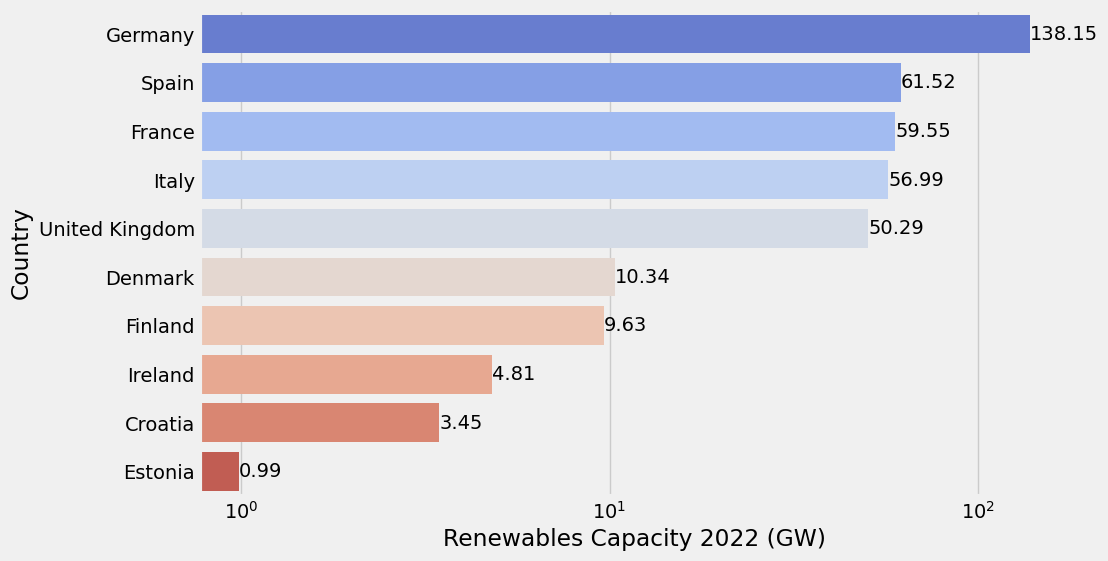

,PPA Capacity 2022 (MW)
Country,
Spain,3112.30
United Kingdom,2125.80
Germany,1615.13
Netherlands,1178.50
Poland,1155.80


,PPA Capacity 2022 (MW)
Country,
Estonia,99.0
Portugal,98.0
Ireland,61.3
Croatia,46.0
Austria,5.5


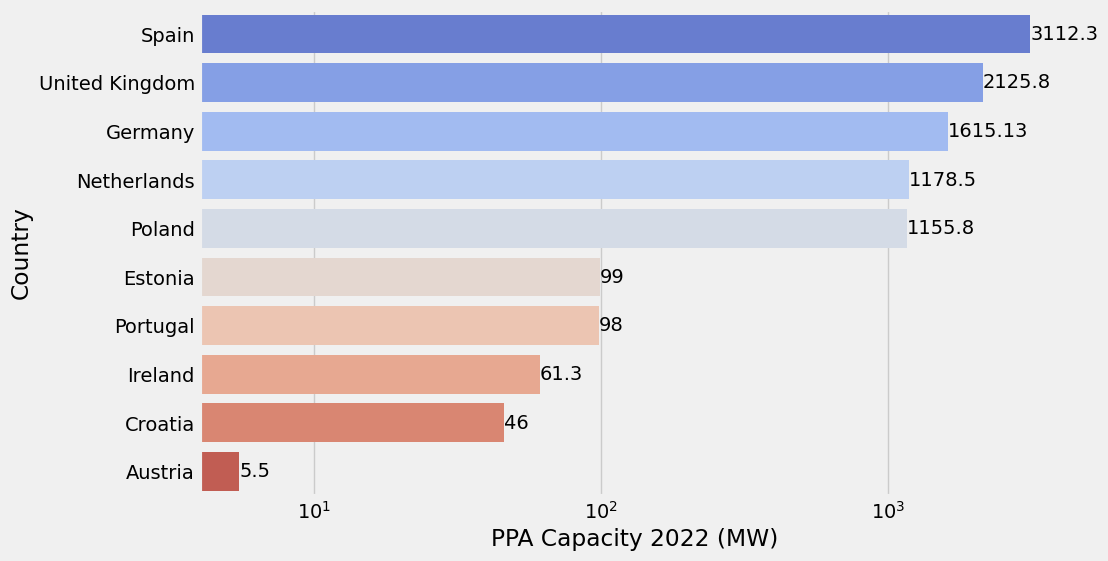

,RE Generation Per Capita 2021 (MWh)
Country,
Sweden,11.06
Finland,6.84
Netherlands,6.83
Austria,5.91
Denmark,4.46


,RE Generation Per Capita 2021 (MWh)
Country,
Belgium,1.96
France,1.90
United Kingdom,1.82
Portugal,1.36
Norway,0.04


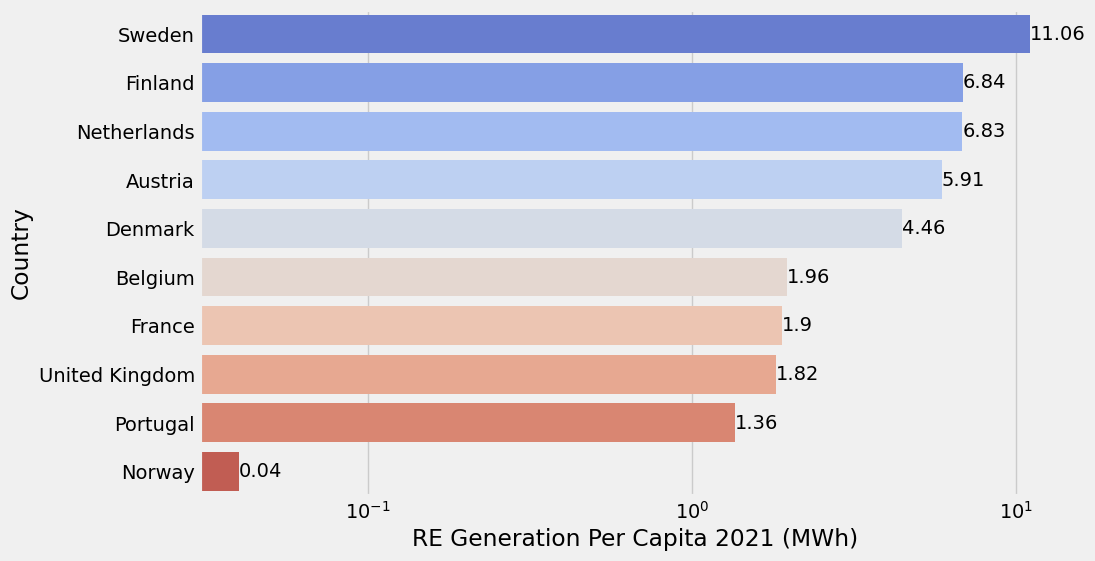

,RE Consumption Per Capita 2021 (MWh)
Country,
Norway,75.24
Sweden,30.87
Finland,20.12
Netherlands,18.33
Austria,17.30


,RE Consumption Per Capita 2021 (MWh)
Country,
France,5.54
Italy,5.47
Greece,5.43
United Kingdom,5.32
Poland,2.50


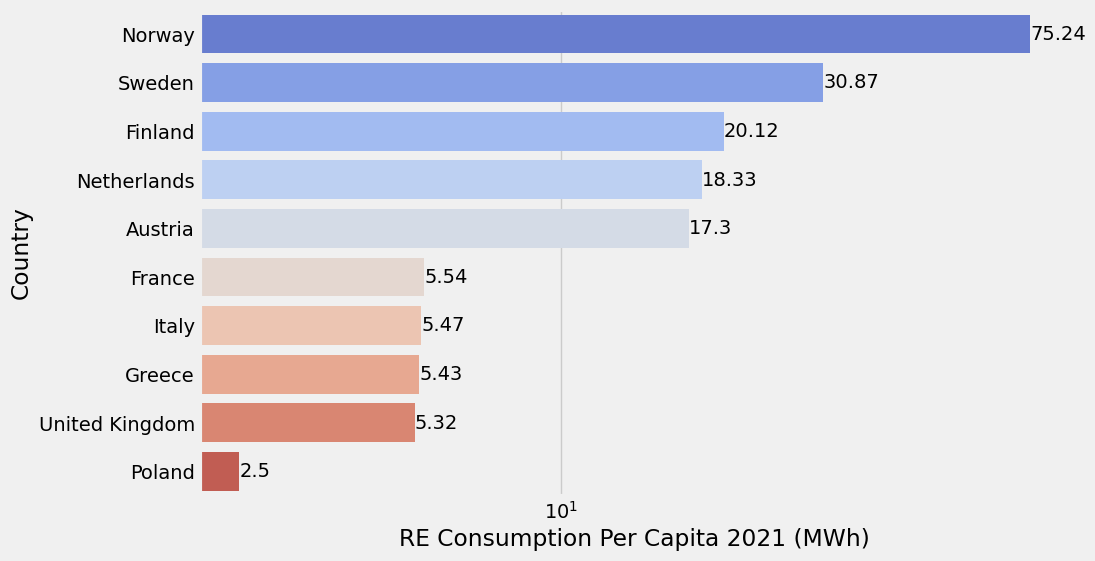

In [90]:
for col_name in energy.columns:
        
        col = energy[[col_name]].round(2).sort_values(by=col_name, ascending=False)
        head = col.head(5)
        tail = col.tail(5)
        head_and_tail = pd.concat([head, tail], axis=0)
        display(head)
        print('\n')
        display(tail)

        plt.figure(figsize=(10, 6))
        ax = sns.barplot(data=head_and_tail, x=col_name, y=head_and_tail.index,palette='coolwarm')
        plt.xscale('log')
        ax.bar_label(ax.containers[0])
        plt.show()

### Subcategory charts

In [91]:
rw_categories = df_rw[['Country', 'PS Score', 'MO Score',
                       'IS Score', 'MS Score', 'LF Score',
                       'FE Score', 'IO Score', 'Overall Score']]

In [92]:
# Rename cols for clarity
rw_categories.columns = ['Country', 'Policy Support Score', 'Market Outlook Score',
                         'Institutional Stability Score', 'Market Size Score', 'Legal Framework Score',
                         'Financing Environment Score', 'Investment Openess Score', 'Overall Score']

In [93]:
rw_categories.sort_values(by="Overall Score", ascending=False, inplace=True)

In [94]:
# Round values for clarity
display(rw_categories.round(2).head())
print('\n')
display(rw_categories.round(2).tail())

,Country,Policy Support Score,Market Outlook Score,Institutional Stability Score,Market Size Score,Legal Framework Score,Financing Environment Score,Investment Openess Score,Overall Score
7,Netherlands,81.83,60.38,97.45,86.45,86.65,77.60,66.18,79.50
12,Denmark,65.78,63.98,89.98,77.10,80.80,86.35,51.87,73.69
10,Sweden,61.70,66.60,84.15,89.90,58.28,87.15,32.77,68.65
1,United Kingdom,72.55,44.92,62.45,53.90,68.28,77.03,69.42,64.08
2,Switzerland,79.95,67.80,85.80,78.82,38.30,76.87,20.73,64.04


,Country,Policy Support Score,Market Outlook Score,Institutional Stability Score,Market Size Score,Legal Framework Score,Financing Environment Score,Investment Openess Score,Overall Score
18,Cyprus,29.95,40.00,31.65,11.07,30.82,35.45,61.10,34.29
28,Croatia,8.57,43.55,24.10,61.00,25.80,19.68,57.25,34.28
8,Greece,35.33,25.95,19.15,47.28,20.80,20.20,61.83,32.93
19,Slovenia,41.60,27.73,6.63,8.32,40.80,59.47,42.02,32.37
11,Hungary,49.97,36.58,24.12,17.50,22.45,19.92,46.13,30.95


In [95]:
# Create top 10 tables and basic visuals per column

def rank_n_chart(df, index_col, x_col='Country', num=31):
    """ Create top n ranking of each col from your dataframe 
        and make basic charts from each."""
    
    # Table creation
    index_col = df.columns[index_col]
    var = df[[x_col, index_col]]
    var =  var.sort_values(by=index_col, ascending=False)[:num].round(2)
    
    # Chart formatting
    #pal = sns.color_palette("Greens_d", len(index_col))
    #palette=np.array(pal[::-1])
    plt.figure(figsize=(10, 15))
    sns.scatterplot(data=var, x=index_col, y=x_col, s=300)
    plt.show()

    var.set_index(x_col,inplace=True)
    print(display(var))
    return var

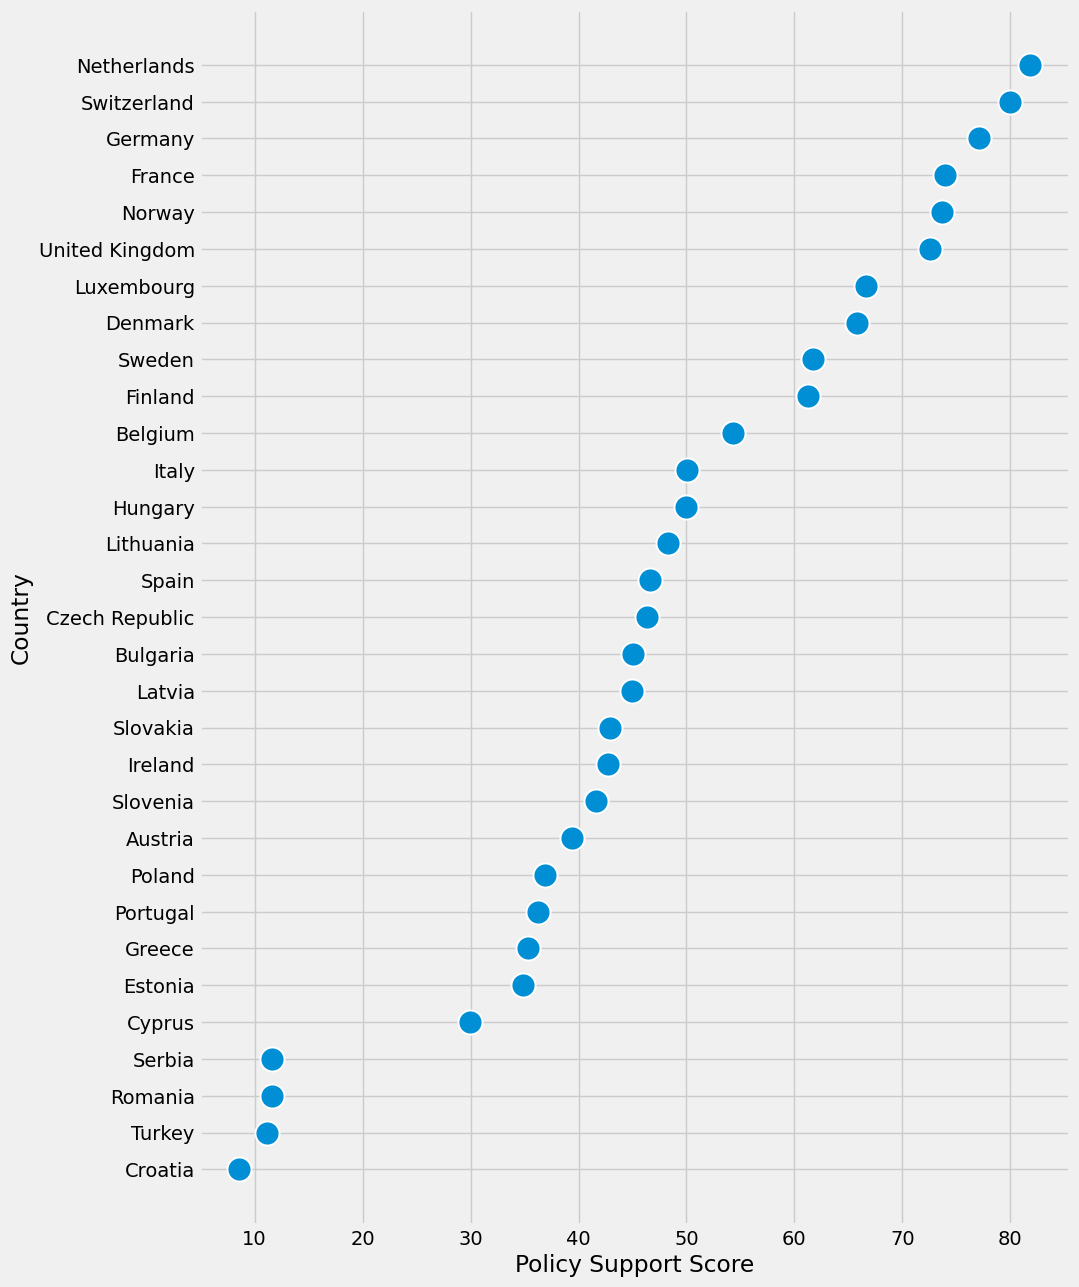

,Policy Support Score
Country,
Netherlands,81.83
Switzerland,79.95
Germany,77.12
France,73.95
Norway,73.68
United Kingdom,72.55
Luxembourg,66.60
Denmark,65.78
Sweden,61.70


None


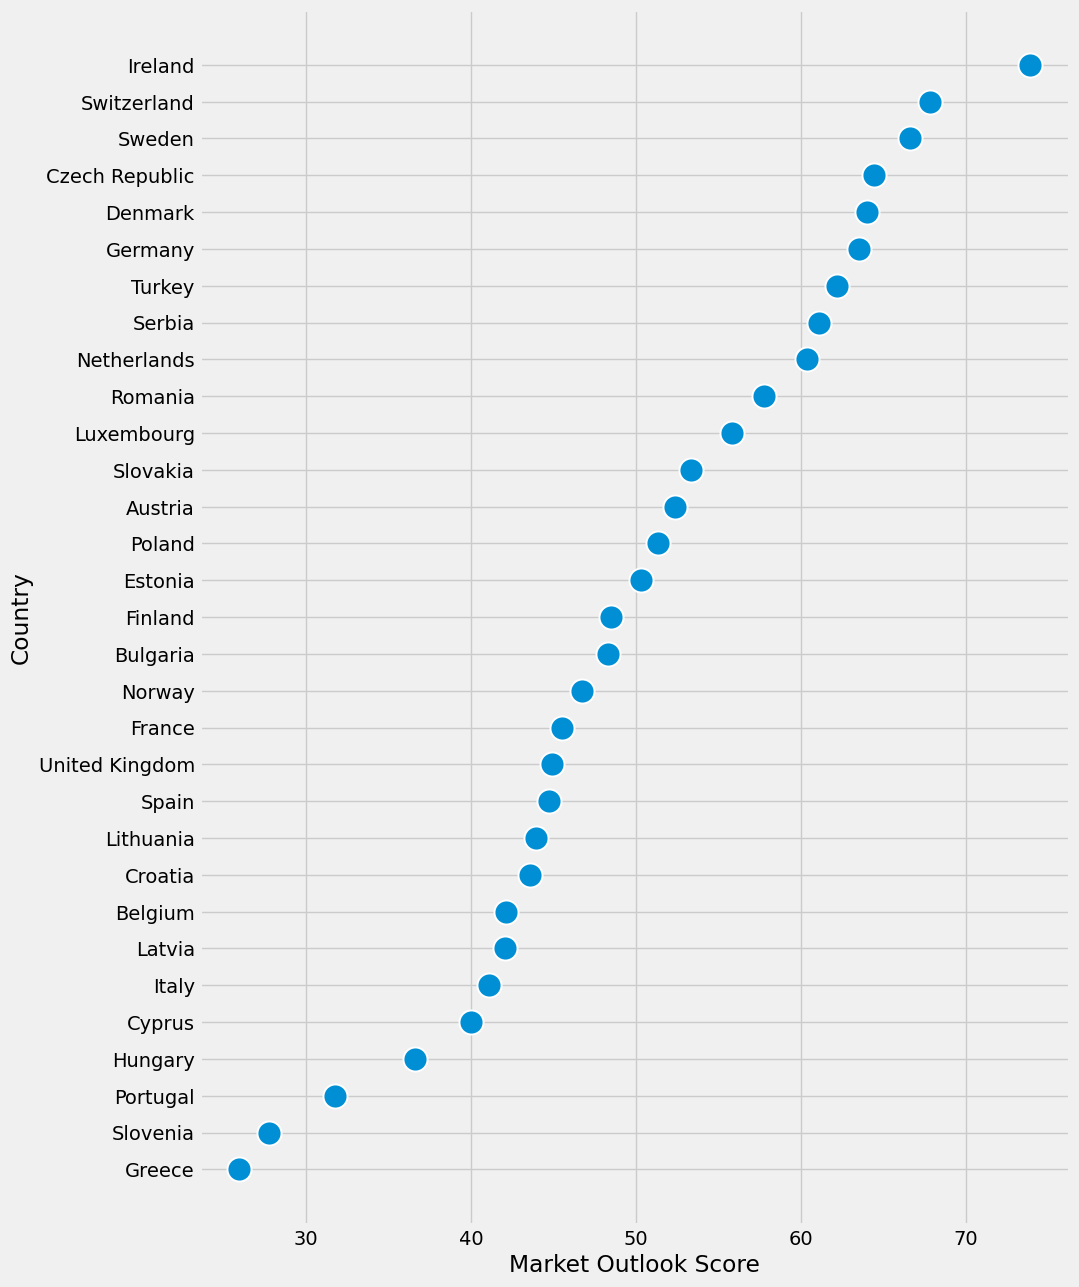

,Market Outlook Score
Country,
Ireland,73.88
Switzerland,67.80
Sweden,66.60
Czech Republic,64.40
Denmark,63.98
Germany,63.52
Turkey,62.20
Serbia,61.10
Netherlands,60.38


None


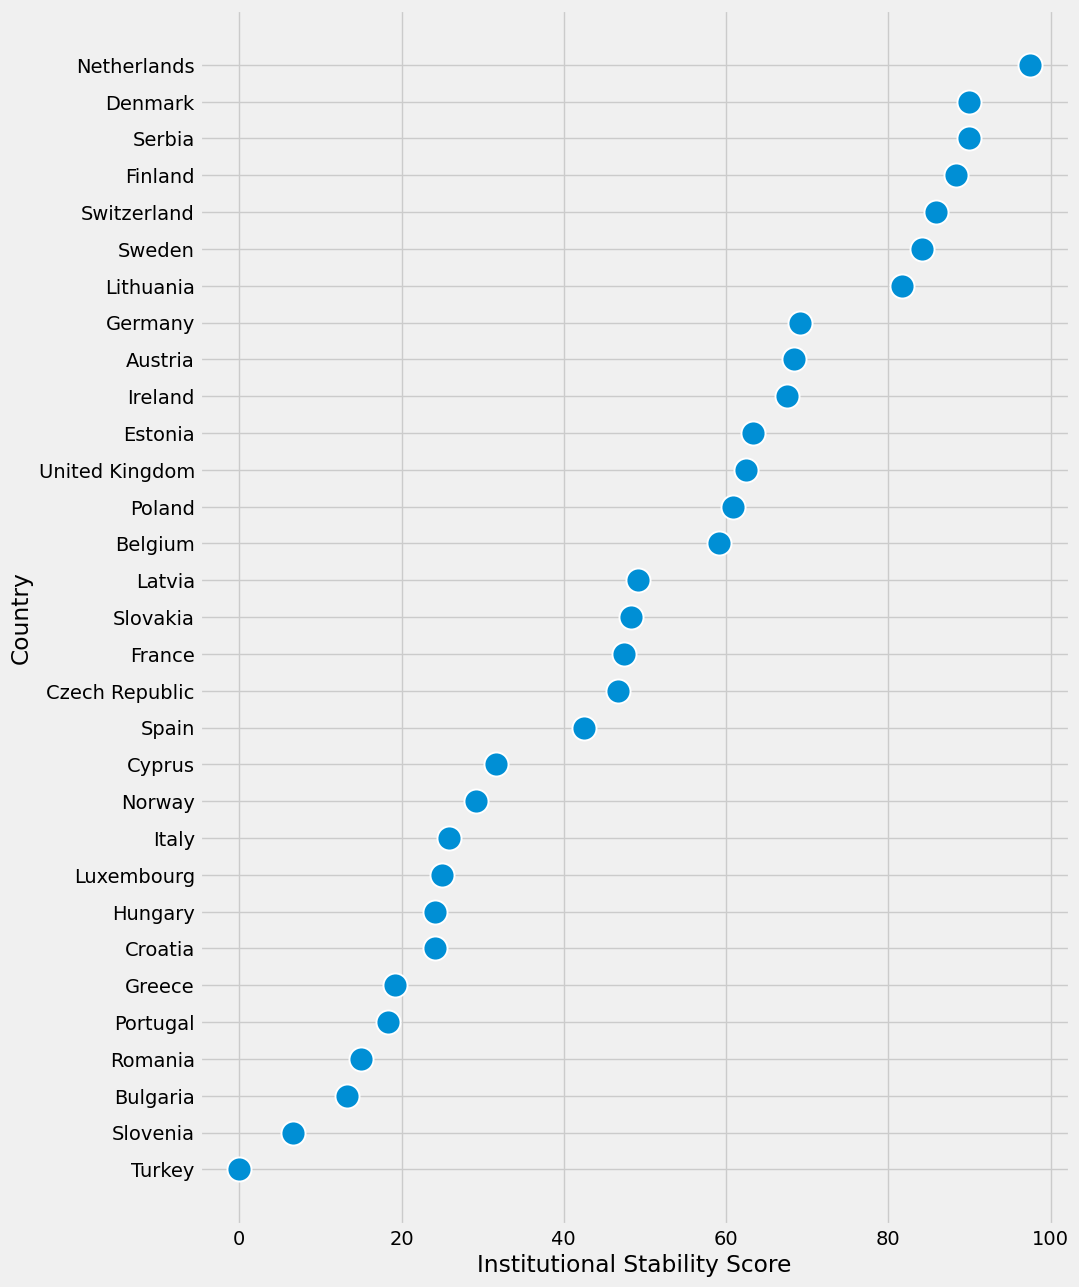

,Institutional Stability Score
Country,
Netherlands,97.45
Denmark,89.98
Serbia,89.95
Finland,88.30
Switzerland,85.80
Sweden,84.15
Lithuania,81.62
Germany,69.12
Austria,68.30


None


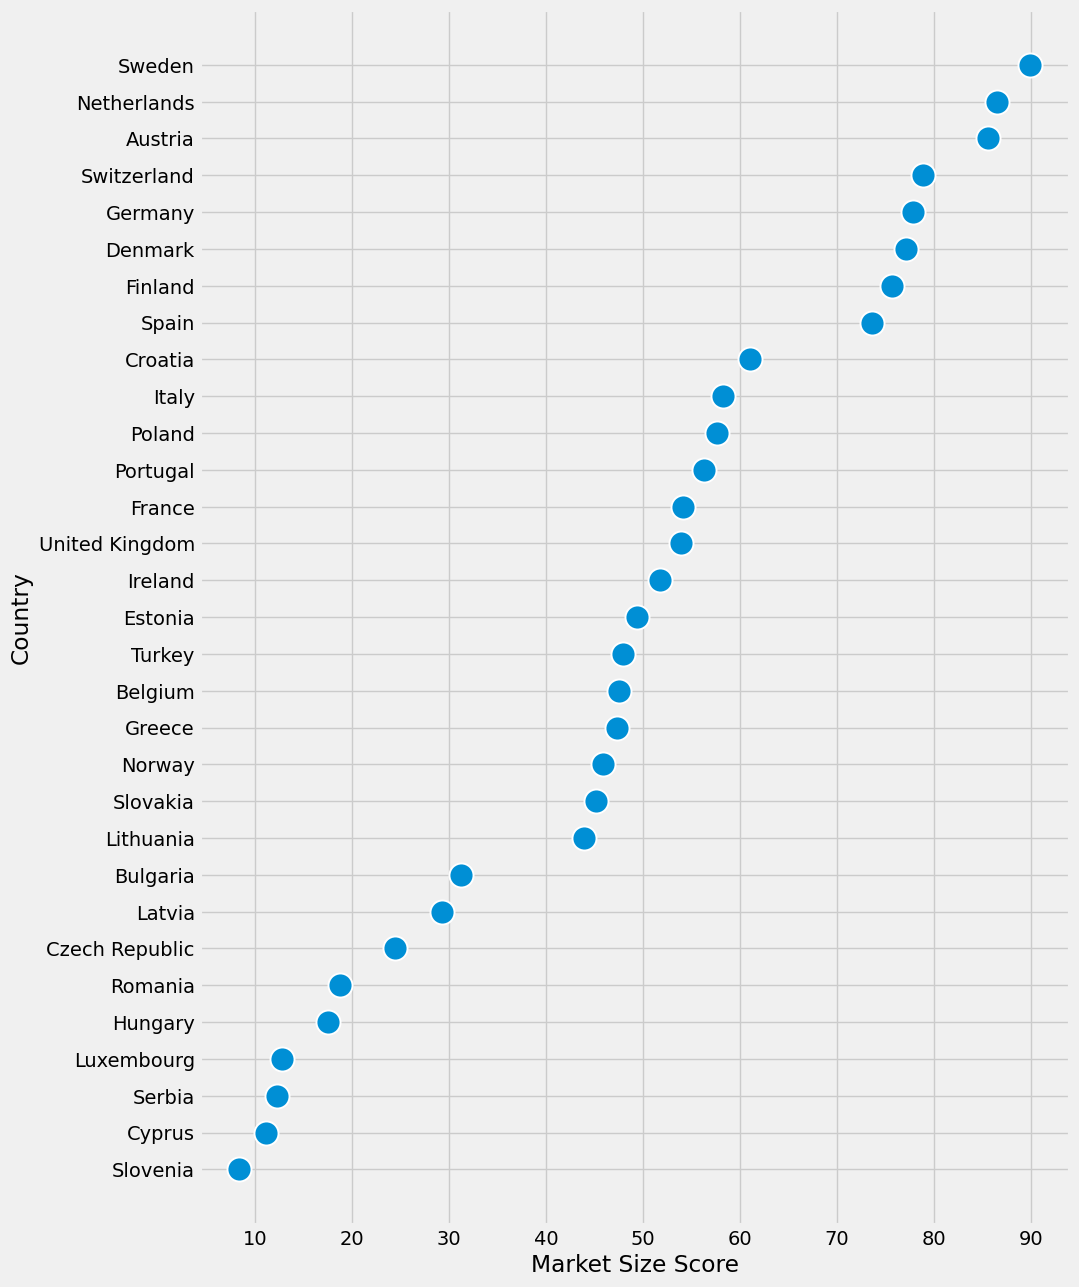

,Market Size Score
Country,
Sweden,89.90
Netherlands,86.45
Austria,85.58
Switzerland,78.82
Germany,77.82
Denmark,77.10
Finland,75.68
Spain,73.58
Croatia,61.00


None


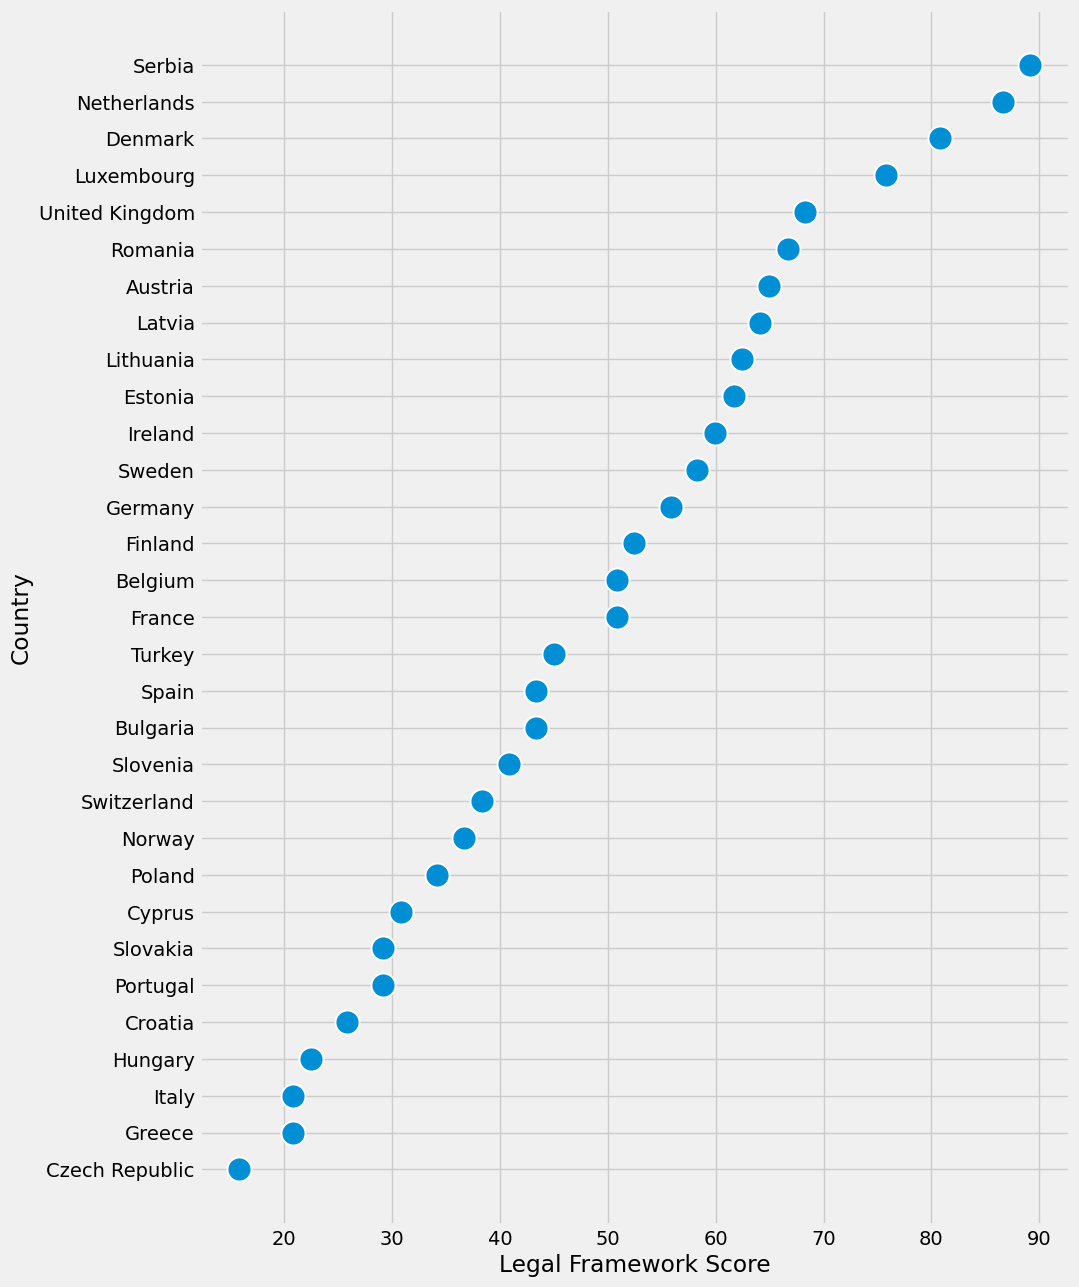

,Legal Framework Score
Country,
Serbia,89.15
Netherlands,86.65
Denmark,80.80
Luxembourg,75.82
United Kingdom,68.28
Romania,66.65
Austria,64.97
Latvia,64.12
Lithuania,62.45


None


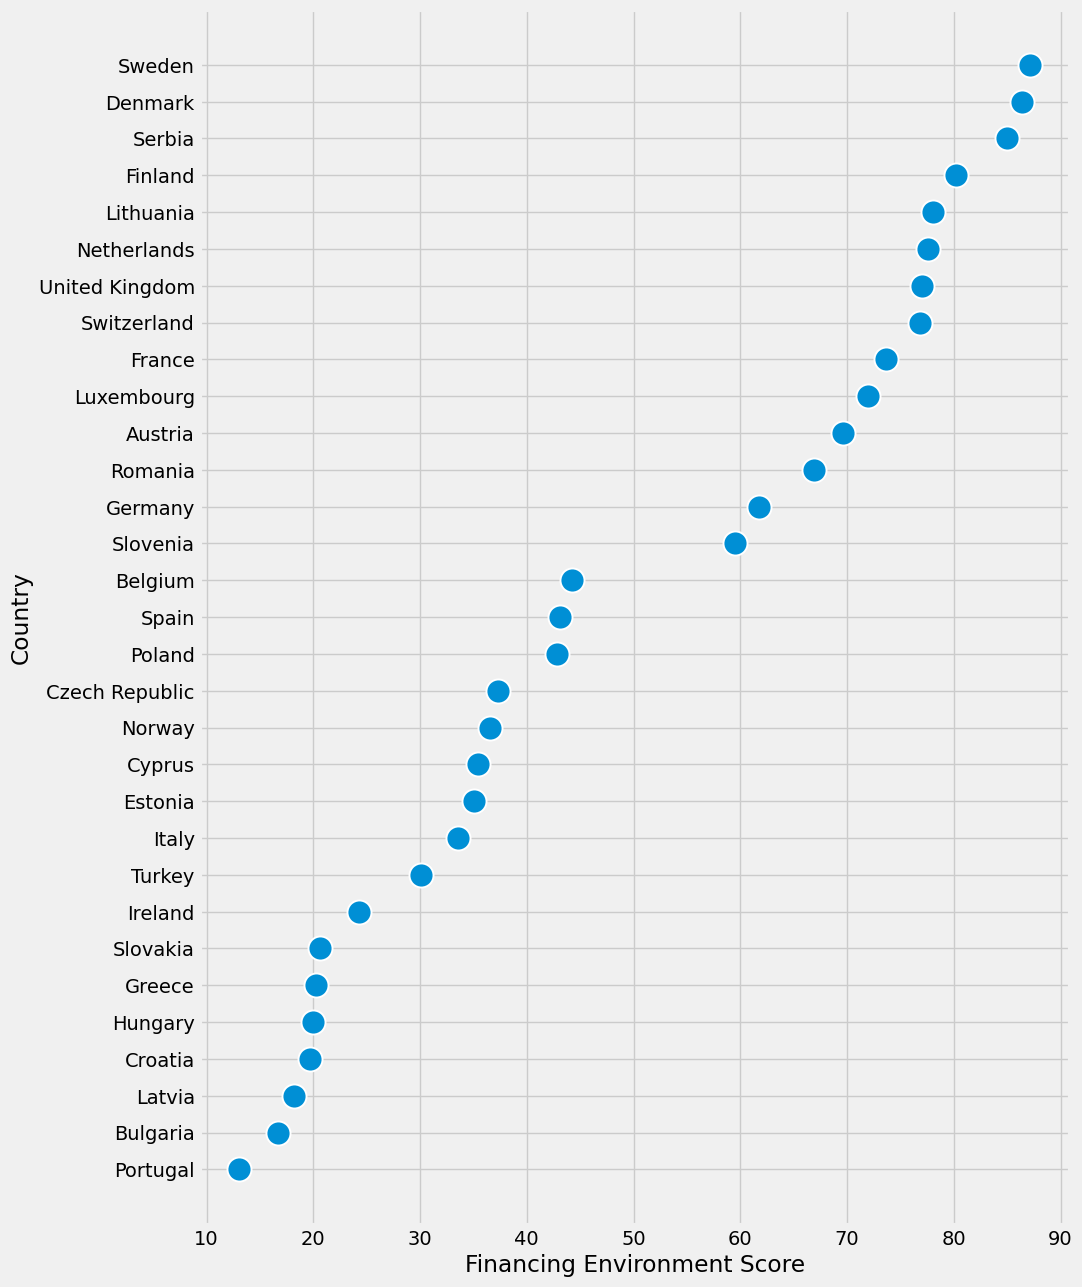

,Financing Environment Score
Country,
Sweden,87.15
Denmark,86.35
Serbia,84.95
Finland,80.22
Lithuania,78.08
Netherlands,77.60
United Kingdom,77.03
Switzerland,76.87
France,73.68


None


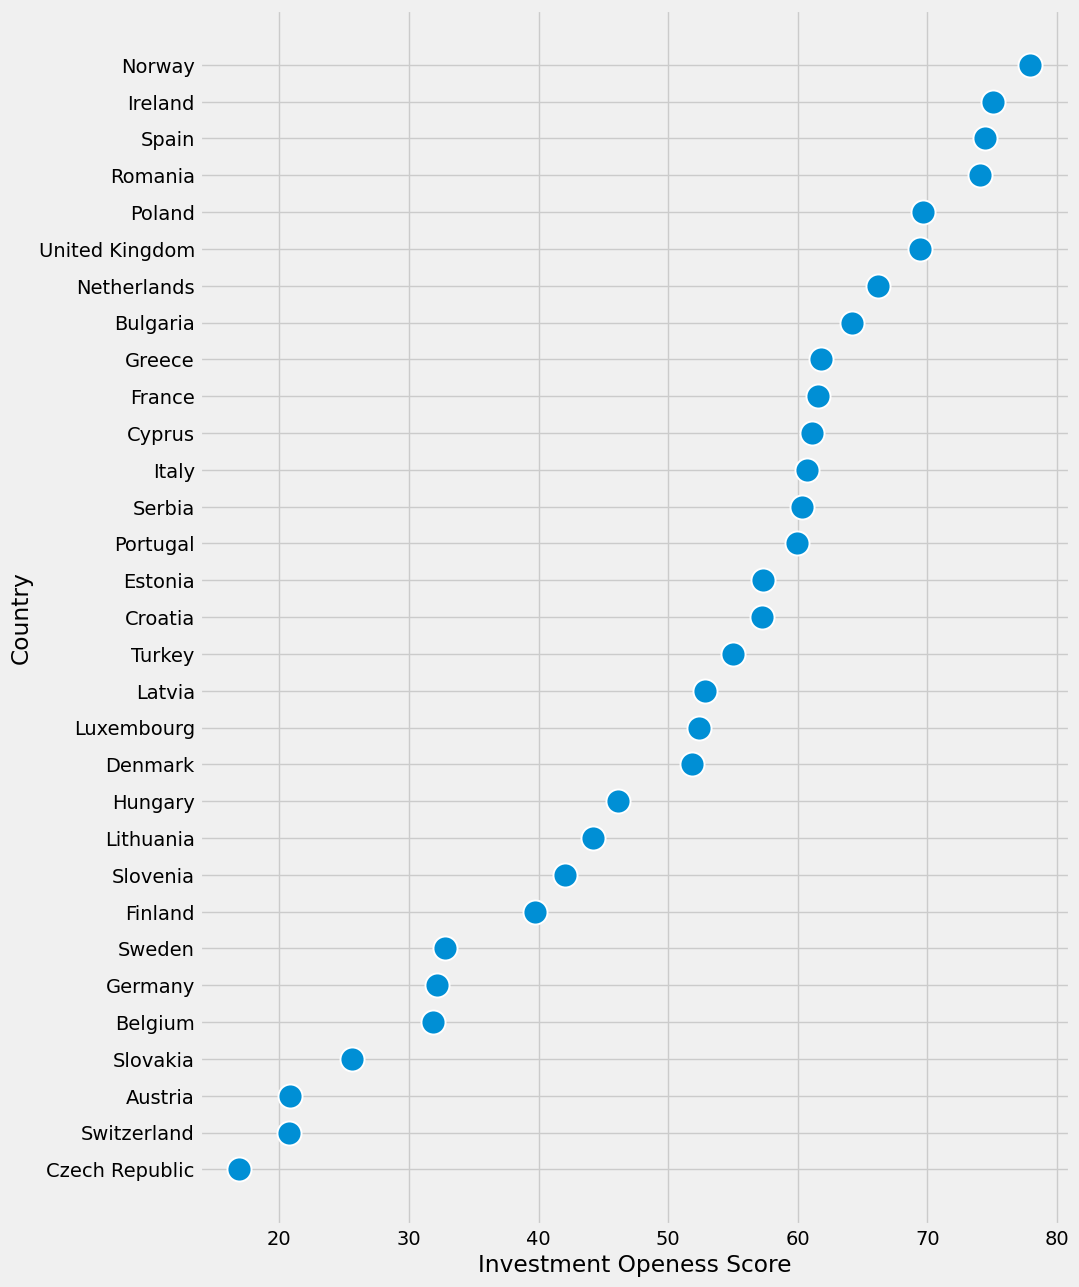

,Investment Openess Score
Country,
Norway,77.93
Ireland,75.10
Spain,74.43
Romania,74.03
Poland,69.63
United Kingdom,69.42
Netherlands,66.18
Bulgaria,64.20
Greece,61.83


None


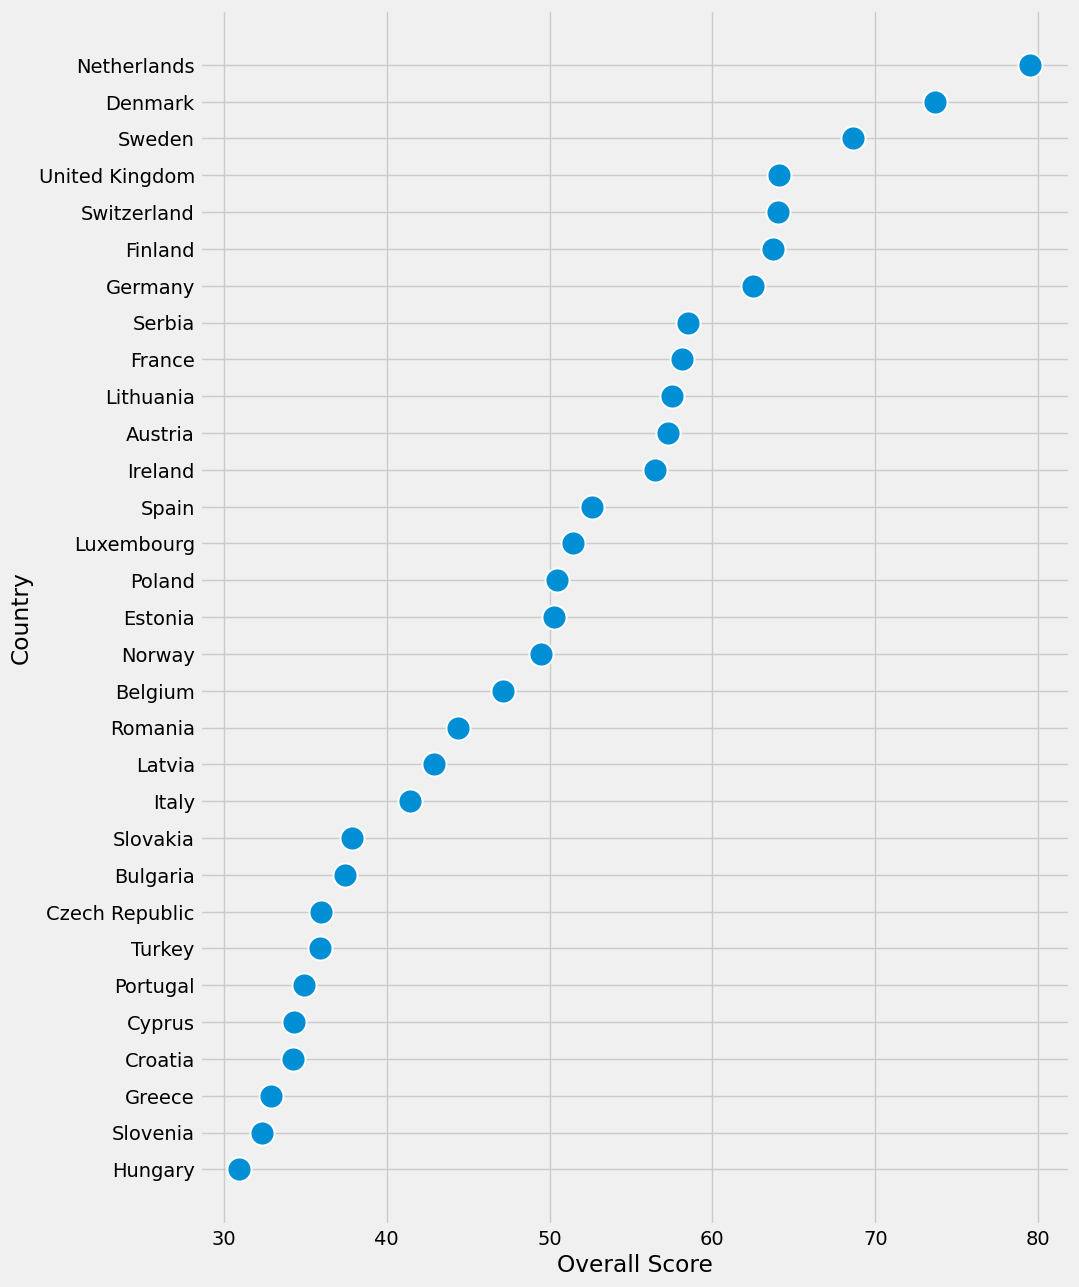

,Overall Score
Country,
Netherlands,79.50
Denmark,73.69
Sweden,68.65
United Kingdom,64.08
Switzerland,64.04
Finland,63.73
Germany,62.48
Serbia,58.47
France,58.14


None


In [96]:
for i in range(len(rw_categories.columns)):
    try:
        rank_n_chart(rw_categories, i+1)
    except IndexError:
        pass

### Sub copies of df with rankings

In [122]:
# Make copy without averages
rw_countries = rw_categories.copy()
rw_countries.head()

,Country,Policy Support Score,Market Outlook Score,Institutional Stability Score,Market Size Score,Legal Framework Score,Financing Environment Score,Investment Openess Score,Overall Score
7,Netherlands,81.833333,60.375,97.450,86.450,86.650,77.600000,66.175000,79.504762
12,Denmark,65.775000,63.975,89.975,77.100,80.800,86.350000,51.866667,73.691667
10,Sweden,61.700000,66.600,84.150,89.900,58.275,87.150000,32.766667,68.648810
1,United Kingdom,72.550000,44.925,62.450,53.900,68.275,77.025000,69.425000,64.078571
2,Switzerland,79.950000,67.800,85.800,78.825,38.300,76.866667,20.733333,64.039286


In [120]:
# Add European average record to rw_categories
rw_categories['Averages'] = rw_categories.mean(numeric_only=True, axis=1) # Take all numeric columns only, creates a new col
rw_categories.loc['Europe'] = rw_categories.mean(numeric_only=True) # transpose to record in the df
rw_categories['Country'].replace(np.NaN, "European Average", inplace=True) # Name the record in the country col
rw_categories.drop(columns='Averages', inplace=True) # drop the unneeded col

In [104]:
# Create ranking columns for rw_countries
for col in rw_countries.columns[1:]:
   rw_countries[col + "_Rank"] = rw_countries.sort_values(by=[col],ascending=False).reset_index().sort_values('index').index + 1

In [121]:
rw_countries = rw_countries.round(2)
rw_countries.head()

,Country,Policy Support Score,Market Outlook Score,Institutional Stability Score,Market Size Score,Legal Framework Score,Financing Environment Score,Investment Openess Score,Overall Score,Policy Support Score_Rank,Market Outlook Score_Rank,Institutional Stability Score_Rank,Market Size Score_Rank,Legal Framework Score_Rank,Financing Environment Score_Rank,Investment Openess Score_Rank,Overall Score_Rank
7,Netherlands,81.83,60.38,97.45,86.45,86.65,77.60,66.18,79.50,3,6,8,5,13,13,26,7
12,Denmark,65.78,63.98,89.98,77.10,80.80,86.35,51.87,73.69,6,20,12,14,5,7,6,4
10,Sweden,61.70,66.60,84.15,89.90,58.28,87.15,32.77,68.65,2,2,5,4,21,8,30,5
1,United Kingdom,72.55,44.92,62.45,53.90,68.28,77.03,69.42,64.08,4,19,17,13,16,9,10,9
2,Switzerland,79.95,67.80,85.80,78.82,38.30,76.87,20.73,64.04,12,26,22,10,29,22,12,21


In [108]:
# Filter to six countries
six_countries = ["Netherlands", "United Kingdom", "Germany", "Poland", "Spain", "Norway"]
top_six = rw_countries[rw_countries["Country"].isin(six_countries)]

In [112]:
top_six_scores = top_six[["Country", "Policy Support Score",	"Market Outlook Score",	"Institutional Stability Score",
                          	"Market Size Score",	"Legal Framework Score",	"Financing Environment Score",
                            "Investment Openess Score",	"Overall Score"]]
top_six_scores

,Country,Policy Support Score,Market Outlook Score,Institutional Stability Score,Market Size Score,Legal Framework Score,Financing Environment Score,Investment Openess Score,Overall Score
7,Netherlands,81.83,60.38,97.45,86.45,86.65,77.60,66.18,79.50
1,United Kingdom,72.55,44.92,62.45,53.90,68.28,77.03,69.42,64.08
0,Germany,77.12,63.52,69.12,77.82,55.80,61.75,32.20,62.48
26,Spain,46.63,44.72,42.48,73.58,43.30,43.08,74.43,52.60
30,Poland,36.90,51.30,60.80,57.65,34.10,42.82,69.63,50.46
21,Norway,73.68,46.72,29.13,45.82,36.65,36.50,77.93,49.49


In [113]:
top_six_ranking = top_six[["Country", "Policy Support Score_Rank",	"Market Outlook Score_Rank",	"Institutional Stability Score_Rank",
                           	"Market Size Score_Rank",	"Legal Framework Score_Rank",	"Financing Environment Score_Rank",
                            "Investment Openess Score_Rank",	"Overall Score_Rank"]]
top_six_ranking

,Country,Policy Support Score_Rank,Market Outlook Score_Rank,Institutional Stability Score_Rank,Market Size Score_Rank,Legal Framework Score_Rank,Financing Environment Score_Rank,Investment Openess Score_Rank,Overall Score_Rank
7,Netherlands,3,6,8,5,13,13,26,7
1,United Kingdom,4,19,17,13,16,9,10,9
0,Germany,17,17,29,23,19,30,8,23
26,Spain,8,5,2,6,3,2,20,2
30,Poland,14,22,7,22,9,5,22,10
21,Norway,26,15,11,16,10,21,15,16


In [114]:
top_six = pd.concat([top_six_scores, top_six_ranking], axis=0)

In [117]:
top_six.sort_values(by="Country", ascending=True, inplace=True)
top_six

,Country,Policy Support Score,Market Outlook Score,Institutional Stability Score,Market Size Score,Legal Framework Score,Financing Environment Score,Investment Openess Score,Overall Score,Policy Support Score_Rank,Market Outlook Score_Rank,Institutional Stability Score_Rank,Market Size Score_Rank,Legal Framework Score_Rank,Financing Environment Score_Rank,Investment Openess Score_Rank,Overall Score_Rank
0,Germany,77.12,63.52,69.12,77.82,55.80,61.75,32.20,62.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,17.0,29.0,23.0,19.0,30.0,8.0,23.0
7,Netherlands,81.83,60.38,97.45,86.45,86.65,77.60,66.18,79.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Netherlands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,6.0,8.0,5.0,13.0,13.0,26.0,7.0
21,Norway,73.68,46.72,29.13,45.82,36.65,36.50,77.93,49.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,Norway,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,15.0,11.0,16.0,10.0,21.0,15.0,16.0
30,Poland,36.90,51.30,60.80,57.65,34.10,42.82,69.63,50.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,Poland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,22.0,7.0,22.0,9.0,5.0,22.0,10.0
26,Spain,46.63,44.72,42.48,73.58,43.30,43.08,74.43,52.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,Spain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,5.0,2.0,6.0,3.0,2.0,20.0,2.0


In [118]:
# # Do the rest in excel
# filename = "top_six.xlsx"
# sheet = "data"
# top_six.to_excel(path + '/' + filename, sheet_name=sheet, index=False)

### Radar Charts

- show top 5 and bottom 5 as separate charts
- use function to allow for more configurability
- Add average record in the df

In [249]:
def radar_chart(df, x_col, y_col, order, num=5, title=None):
    """Build a radar chart with plotly with categorical x values and continuous y values.
        Defaults to top 5 and bottom 5 in a df sorted by your y_col. Set order to 1 or 2.
        Be sure to import plotly.graph objects as go at the start of your script."""
    
    fig = go.Figure()
    df = df.sort_values(by=y_col, ascending=False)
    attributes = df.columns[1:-1]
    attributes = [*attributes, attributes[0]]

    transposed = df.round(2).transpose() # Transpose df to allow easier radar chart formatting
    transposed.columns = df[x_col]
    averages = transposed['European Average'] # create your average 'record' before inserting to the function
    
    averages = averages[1:-1]
    transposed['European Average'] = averages
    transposed = transposed.iloc[1:-1,:] # Remove averages and overall score (last 2 col) and country (assigned to col name instead)

    # Filter your top and bottom x values here
    if order == 1:
        order = transposed.iloc[:,:num] # assigns to top num group
    elif order == 2:    
        order = transposed.iloc[:,-num:] # assigns to bottom num group
    else:
        print("Type 1 or 2 as your fourth argument.")

    for col in order.columns:
        col_val = order[col].values.tolist()
        col_val = [*col_val, col_val[0]] # reinsert first value so radar chart 'closes'

        fig.add_trace(go.Scatterpolar(
            mode="lines+markers+text",
            r=col_val,
            theta=attributes,
            #fill='toself'
            name=col,
            text=col_val,
            textposition="top right",
            textfont=dict(
                size=18,
                color="blue"
            )
        ))
    
    # Add average plot to graph
    fig.add_trace(go.Scatterpolar(
            mode="lines+markers+text",
            r=[*averages, averages[0]],
            theta=attributes,
            name="European Average"#,
            # text = [*averages, averages[0]],
            # textposition="top center"
    ))

    # Tinker with chart size here
    # See if we can set color scheme
    fig.update_layout(
        title=title,
        autosize=False,
        width=1400,
        height=800,
        font=dict(
        size=20
        ),
        polar=dict(
            radialaxis=dict(
                visible=False
        )),
    )
    showlegend=True
    
    # Will show combined radar of selected countries
    fig.show()

In [250]:
# Top 5
top_5 = radar_chart(rw_categories,"Country", "Overall Score", 1, 5)

In [251]:
# Bottom 5
bottom_5 = radar_chart(rw_categories,"Country", "Overall Score", 2, 5)

### Europe Heatmap

Use Choropleth Maps
- look up further customization options
- find way to lock map zoom/pan

In [213]:
def heatmap(df, index, subcategory, coverage="europe"):
    """ Make heatmap on all subcategories. """

    fig = px.choropleth(df, locations=index, 
                    color=subcategory, locationmode="country names",
                     scope="europe")
    fig.update_layout(
        # title=subcategory,
        autosize=False,
        dragmode=False,
        width=900,
        height=800
    )

    fig.show()

In [214]:
for col in rw_categories.columns[1:]:
    try:
        heatmap(rw_categories, "Country", col, coverage="europe")
    except:
        pass